In [9]:
import os
import sys
module_path = os.path.abspath(os.path.join('./../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [47]:
import ast
from pprint import pprint
import re
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from src.utils.visualization import plot_clf_report, plot_conf_matrix
from consts import DATASET_LABEL_TO_INDEX, DATASET_PATHS

In [16]:
RESULTS_PATH = "./../../results/results.csv"

In [17]:
os.getcwd()

'E:\\Projects\\master_text_classification\\src\\viz'

In [18]:
results_df = pd.read_csv(RESULTS_PATH)
results_df = results_df.fillna(0)
results_df

,accuracy,recall_macro,precision_macro,f1_macro,model_name,embedding_name,column_name,dataset_name,best_params,classification_report,confusion_matrix
0,0.855560,0.855560,0.855640,0.855552,lr,fasttext,clean_text,imdb,"{'lr_clf__C': 100, 'lr_clf__max_iter': 10000}","{'Negative': {'precision': 0.8573610999437163,...",[[10663 1837]\n [ 1774 10726]]
1,0.841040,0.841040,0.841111,0.841032,lr,glove,clean_text,imdb,"{'lr_clf__C': 100, 'lr_clf__max_iter': 10000}","{'Negative': {'precision': 0.8404952076677317,...",[[10523 1977]\n [ 1997 10503]]
2,0.860080,0.860080,0.860139,0.860074,lr,word2vec,clean_text,imdb,"{'lr_clf__C': 100, 'lr_clf__max_iter': 10000}","{'Negative': {'precision': 0.862166076601223, ...",[[10715 1785]\n [ 1713 10787]]
3,0.532761,0.532726,0.529282,0.530427,lr,fasttext,clean_text,yelp,"{'lr_clf__C': 100, 'lr_clf__max_iter': 10000}",{'Extremely Negative': {'precision': 0.6570059...,[[5894 1583 262 102 226]\n [1969 3482 1753 ...
4,0.517662,0.517655,0.514020,0.515194,lr,glove,clean_text,yelp,"{'lr_clf__C': 100, 'lr_clf__max_iter': 10000}",{'Extremely Negative': {'precision': 0.6387993...,[[5746 1576 359 142 244]\n [1989 3343 1755 ...
...,...,...,...,...,...,...,...,...,...,...,...
60,0.512162,0.511719,0.511288,0.509700,transformer_embeddings,bert-base-uncased,clean_text,yelp,"{'hidden_dim': 128, 'output_dim': 5, 'bidirect...",{'Extremely Negative': {'precision': 0.6341322...,[[5503 1572 490 232 270]\n [1944 2876 2041 ...
61,0.843240,0.843153,0.843312,0.843175,transformer_embeddings,bert-base-uncased,clean_text,imdb,"{'hidden_dim': 128, 'output_dim': 2, 'bidirect...","{'Negative': {'precision': 0.8316314414628354,...",[[10506 1994]\n [ 2127 10373]]
62,0.608670,0.565238,0.571930,0.542810,custom_embeddings,custom_word_embedding,tokenized_clean_text,corona,"{'input_dim': 30002, 'embedding_dim': 300, 'hi...",{'Extremely Negative': {'precision': 0.5602678...,[[ 251 4547 135 459 89]\n [ 134 6912 690 ...
63,0.503287,0.503471,0.499518,0.500008,custom_embeddings,custom_word_embedding,tokenized_clean_text,yelp,"{'input_dim': 30002, 'embedding_dim': 300, 'hi...",{'Extremely Negative': {'precision': 0.6414403...,[[5433 1810 327 158 339]\n [1880 3462 1520 ...


In [19]:
def preprocess_string_confusion_matrix(string_cm):
    string_cm= re.sub(' +', ' ', string_cm).replace("[ ", "[").replace(" ", ",")#.replace("\n,", ",")
    matrix = []
    rows = string_cm.split("\n,")
    for row in rows:
        row_numbers = []
        nums = row.split(",")
        for num in nums:
            row_numbers.append(int(re.sub('[^0-9]', '', num)))
        matrix.append(row_numbers)
    return matrix

imdb
yelp
corona


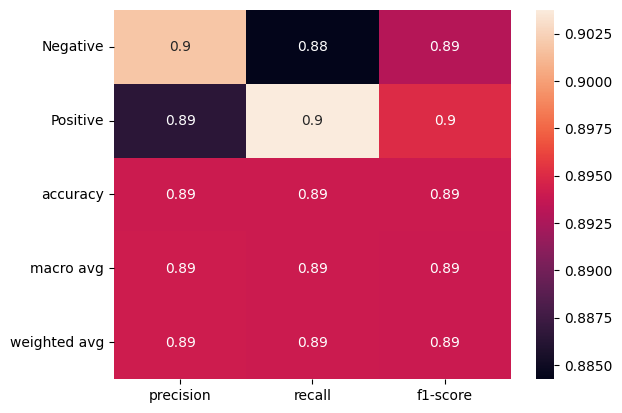

<Figure size 1000x700 with 0 Axes>

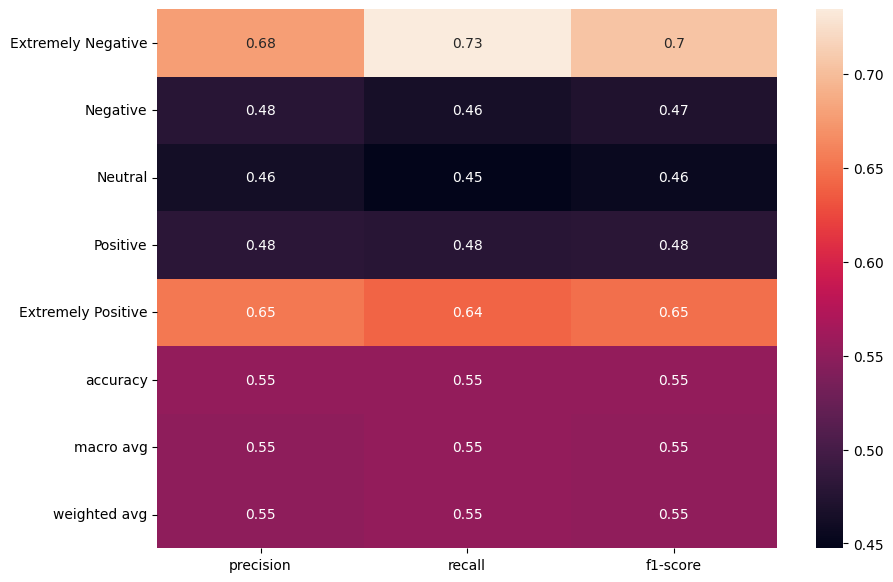

<Figure size 1000x700 with 0 Axes>

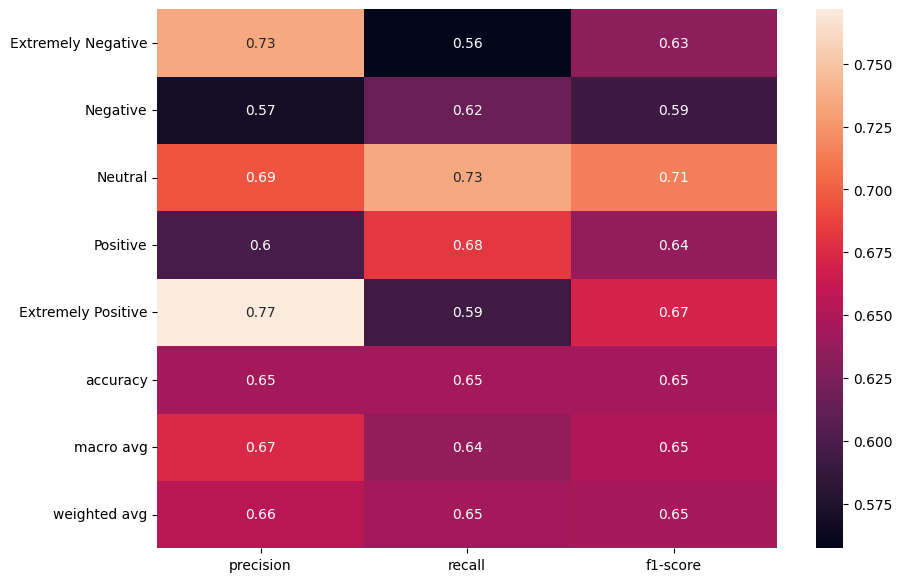

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

In [60]:
unique_dataset_names = results_df['dataset_name'].unique()
gr_df = results_df.groupby(['dataset_name'])
for dataset_name in unique_dataset_names:
    print(dataset_name)
    dataset_results = gr_df.get_group(dataset_name)
    label_mapping = DATASET_LABEL_TO_INDEX[dataset_name]
    
    best_row = dataset_results.sort_values(by='f1_macro', ascending=False).iloc[0]
    cm = preprocess_string_confusion_matrix(best_row['confusion_matrix'])
    
    output_dir = os.path.join("./figs", dataset_name)
    os.makedirs(output_dir, exist_ok=True)
    
    with open(os.path.join(output_dir, "parameters.json"), "w") as fp:
        json.dump(best_row.to_dict(), fp)
    
    plot_clf_report(ast.literal_eval(best_row['classification_report']), output_dir)
    plot_conf_matrix(cm, output_dir=output_dir, class_names=list(label_mapping.keys()))   

In [57]:
results_df[results_df['dataset_name'] == 'yelp'].sort_values(by='f1_macro', ascending=False).iloc[:5]

,accuracy,recall_macro,precision_macro,f1_macro,model_name,embedding_name,column_name,dataset_name,best_params,classification_report,confusion_matrix
42,0.553211,0.553201,0.550660,0.551523,svm,tfidf,clean_text,yelp,"{'svc_clf__C': 1, 'svc_clf__kernel': 'rbf', 't...",{'Extremely Negative': {'precision': 0.6774525...,[[5925 1617 285 101 139]\n [1903 3657 1741 ...
21,0.547111,0.547112,0.541973,0.543788,lr,tfidf,clean_text,yelp,"{'lr_clf__C': 1, 'lr_clf__max_iter': 10000, 't...",{'Extremely Negative': {'precision': 0.6668158...,[[5958 1576 282 104 147]\n [1981 3480 1710 ...
53,0.536461,0.536363,0.538431,0.536515,svm,word2vec,clean_text,yelp,"{'svc_clf__C': 1, 'svc_clf__kernel': 'poly'}",{'Extremely Negative': {'precision': 0.6694300...,[[5814 1720 286 98 149]\n [1831 3648 1771 ...
52,0.534737,0.534651,0.535932,0.534653,svm,fasttext,clean_text,yelp,"{'svc_clf__C': 10, 'svc_clf__kernel': 'poly'}",{'Extremely Negative': {'precision': 0.6677079...,[[5771 1733 281 96 186]\n [1824 3623 1805 ...
5,0.535711,0.535694,0.532544,0.533646,lr,word2vec,clean_text,yelp,"{'lr_clf__C': 100, 'lr_clf__max_iter': 10000}",{'Extremely Negative': {'precision': 0.6659142...,[[5900 1555 292 108 212]\n [1901 3523 1761 ...
